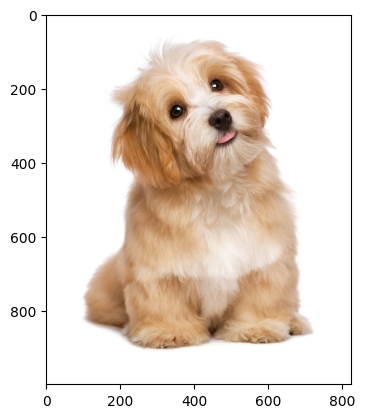

Lhasa: 63.2%
Maltese dog: 4.3%
Dandie Dinmont: 1.7%
Norfolk terrier: 1.6%
Pekinese: 1.6%


: 

In [16]:
from torchvision.models import regnet_y_16gf, RegNet_Y_16GF_Weights
import matplotlib.pyplot as plt
from PIL import Image


weight = RegNet_Y_16GF_Weights.DEFAULT
model = regnet_y_16gf(weight)
model.eval()

# 동물이미지를 테스트 이미지로
im = Image.open("dogg.jpg")
plt.imshow(im)
plt.show()

RegNetTf = RegNet_Y_16GF_Weights.DEFAULT.transforms()
nim = RegNetTf(im)
nim = nim.unsqueeze(0)
nim.shape

# softmax로 정규화
prediction = model(nim).squeeze(0).softmax(0)

# 상위 5개를 뽑는다.
# 1개만 뽑을 경우의 코드:
# class_id = prediction.argmax().item()
sorted_prediction = prediction.argsort(descending=True)[:5]

# 카테고리에 해당하는 라벨을 찾아 출력
for class_id in sorted_prediction:
    score = prediction[class_id].item()
    category_name = weight.meta["categories"][class_id]
    print(f"{category_name}: {100*score:.1f}%")